# CH8. Tree based Methods

## 1. Decision Tree

- Regression과 Classification에 모두 사용 할 수 있음
- Predictor space를 feature의 특성에 따라 나눔
- **이해하기 쉬움**
- Feature가 numerical이나 categorical이여도 상관 없음 (categorical이여도 dummy variable을 만들어야 할 필요 없음)
- Feature 중요도 선정에도 쉬움 (Split이 먼저 이루어지는 feature 일수록, 중요도가 높음)
- 하지만 Overfitting으로 인해, 성능은 만족스럽지 못함 + High variance (이를 보완하여 Bagging, Random Forest, Boodsting)

예시) Feature : Years(연차), Hits(전 시즌 안타 수) | Response : Salary(연봉)

![image](https://i.imgur.com/TLMx11B.jpg)

(해석)

- **Years** feature가 연봉 결정에 가장 중요한 변수이고, 오래된 선수들의 연봉이 높음
- 연차가 오래된 선수일수록 안타가 연봉 결정에 영향을 미치고, 안타수가 높은 선수들의 연봉이 높음

### 1.1 Regression Tree

- Regression Tree는 위의 그림에서 보듯이 구역을 나누어, 같은 구역에 속한 observation들은 같은 response값(보통 같은 구역에 속한 observation들의 response의 mean)으로 예측함
- Regression Tree의 목적은 구역으로 나누어 예측했을 때, RSS를 최소화 하는 것
- 하지만 모든 분할의 경우의 수를 다 따질 수 없기 때문에, **recursive binary splitting**이라는 top-down greedy approach를 사용

(Recursive binary splitting)

모든 predictor ***X***와 cut point ***s***를 비교하여, 해당 predictor의 cut point로 나누었을 때 RSS가 가장 많이 감소하는 경우를 선택

![image](https://i.imgur.com/WMhSuG0.png)

RSS를 가장 많이 감소시키는 ***j***와 ***s***를 선택

### 1.2 Prunning

- Tree를 활용하여 예측하는 경우, 계속 깊게 split을 하다보면 training set에 대한 오류는 낮아지지만, test set에 대한 오류는 높아 질 수 있다. (Overfitting) 
- Full tree가 아닌, 적당한 선에서 subtree를 찾아야 한다. 이를 위한 방법이 **Prunning** 이다.
- tunning parameter ***α***를 이용하여 **Cost Complexity Prunning**을 한다.

![image](https://i.imgur.com/KIoZzFQ.jpg)

3.(b)에서의 prediction error는 아래의 식과 같다.

![image](https://i.imgur.com/55xO54q.jpg)

|T| : the number of terminal nodes of the tree T (Tree의 깊이)

마치 LASSO 회귀모형에서의 prediction error와 비슷한 모양이다. *α*는 subtree의 깊이와, prediction error간의 trade-off 를 조절한다. Tree의 깊이가 깊어지면 training error (식의 왼쪽)이 감소하지만, |T| (식의 오른쪽)은 커진다. 적절한, 최솟값이 되는 tree의 깊이를 찾는데 *α*가 역할을 한다.

(예시)

![image](https://i.imgur.com/FIot0xM.jpg)

### 1.3 Classification Tree

Classification tree도 regression tree와 비슷하다. 차이점은 해당 구역안에 속해있는 observation들의 response 값을 관측치들의 반응변수 값의 mean이 아니라, **most commonly occurring class**로 결정하는 것이다.

Regression tree의 경우 region을 정할 때, RSS를 최소화 하는 방향으로 region을 정했다. Classification의 경우에는 region을 정할 때, 각 region의 **impurity(불순도)** 를 최소화 하는 방향으로 region을 정한다. 즉 하나의 region안에 다른 class들이 섞이지 않고 하나의 class만 남는 방향으로 region을 정한다. 

이를 위해 사용하는 지표가 두 가지 ***Gini index***와 ***Cross-entropy***가 있다.

![image](https://i.imgur.com/WMhSuG0.png)

(예시)
- m 노드(region)에 3개의 클래스에 속한 training observation들의 분포가 각각 5/10, 3/10, 2/10 비율로 있다면, G = 0.5 x 0.5 + 0.3 x 0.7 + 0.2 x 0.8 = 0.62가 된다.

- 만약 training observation들의 분포가 7/10, 1/10, 1/10, 1/10 비율로 있다면, G = 0.7 x 0.3 + 0.1 x 0.9 + 0.1 x 0.9 + 0.1 x 0.9 = 0.48이 된다. (불순도가 낮음)

**recursive binary splitting**을 할 때, 모든 predictor X와 cut point s를 비교하여, 해당 predictor의 cut point로 나누었을 때 불순도(Gini index or Cross-entropy)가 가장 많이 감소하는 경우를 선택

## 2. Bagging

Decision Tree의 가장 큰 문제점은 High Variance이다. 즉 training set에 민감하여, 학습과정과 다른 실제 환경에서는 좋은 성능을 내지 못한다는 점이다. 이를 위해 Decision Tree의 단점인 high variance를 낮추어 low variance를 만들기 위해 다양한 방법이 있다. 그 중 5장에서 배운 **bootstrap** 아이디어를 이용한 것이 **Bagging** (**b**ootstrap **agg**regat**ing**) 이다. 

집단 지성을 이용한다고 생각하면 된다. 주어진 데이터로부터 여러 개의 Decision Tree를 만들어, tree들의 판단을 종합하여 결정한다.

### 2.1 Algorithm

Regression Tree

- B개의 bootstrap training data set을 생성해, B개의 regression tree를 만든다. (Pruning은 하지 않는다.)
- B개의 regression tree를 test set에 적용해, B개의 결과를 얻은 후, **평균**을 구한다.

Classification Tree

- B개의 bootstrap training data set을 생성해, B개의 classification tree를 만든다. (Pruning은 하지 않는다.)
- B개의 classification tree를 test set에 적용해, B개의 결과를 얻은 후, **다수결**을 통해 결정한다.

The number of trees *B* is not a critical parameter with bagging; using a very large value of *B* will not lead to overfitting.

![image](https://i.imgur.com/Vl6LpzH.jpg)

### 2.2 Out-of-Bag

Bagging에서는 cross-validation이나, validation set을 만들어서 error를 측정하는 것보다, 더 직관적인 방법이 있다.

(예시)

한 bagged tree를 만들 때, 관측치들 중에 약 2/3만 training data로 사용하고, 나머지 1/3의 data는 out-of-bag(OOB)로 남겨두어 test data처럼 사용한다. 이를 이용한 OOB error는 tree 모델에 사용되지 않은 데이터의 예측치 오류이기 때문에, 타당한 test error로 볼 수 있다.

![image](https://i.imgur.com/42sV2Ys.jpg)

### 2.3 변수 중요도

Decision tree의 가장 큰 장점 중 하나가, 바로 변수들의 중요도를 쉽게 파악 할 수 있다는 것이다. 하지만 Bagging을 이용하면 모델들을 통합하여 결정을 내리기 때문에 직관적으로 변수들의 중요도를 볼 수 없다. (우리가 아는 익숙한 DT의 그림을 볼 수 없다.)

- Decision tree는 split에 사용될 변수를 결정할 때,  gini index(혹은 RSS)를 가장 작게 만드는 변수를 먼저 선택하는 방법으로 tree를 만든다. 
- 마찬가지로 bagging도 각 data에 대해서 동일한 방법으로 tree를 만들기 때문에, 각 변수는 총 B개의 bagged tree에서 사용된다. 
- 각 bagged tree에서 해당 변수의 gini index 감소량(혹은 RSS 감소량)를 평균내어, 가장 많은 감소량을 보이는 변수를 중요한 변수라고 판단 할 수 있다.

![image](https://i.imgur.com/xSZYmcX.jpg)

## 3. Random Forest

- Bagging에서는 모든 변수가 각 bagged tree에서 사용된다. 만약에 data에 하나의 강력한(매우 중요한) feature가 있다고 가정하자. 
- 이런 경우에, 모든 bagged tree에서 그 중요한 변수는 항상 top split에 사용 될 것이다. 
- 결과적으로 bagged tree는 서로 대부분이 비슷한 모양을 가질 것이고, 이러한 bagged tree 끼리는 highly correlated 된다.
- highly correlated된 bagged tree의 결과를 평균(혹은 다수결)내면, 아무리 많은 tree를 사용했다고 해도 high variance를 해결 할 수 없다.

위의 문제를 해결하기 위해 Random Forest에서는 전체 *p*개의 변수들 중에서, bagged tree를 만들 때 마다 *m*개의 (*m*<*p*) 변수들만을 사용한다.

경험적으로, **m = √p** 인 경우에 가장 좋은 성능을 보인다고 한다.

![image](https://i.imgur.com/JGDPNJy.jpg)

## 4. Boosting

기존의 Bagging이나 RF의 경우에는, bootstrap data가 독립적으로 추출되기 때문에, 각 tree들은 서로 독립적으로 만들어진다. 

반면에 Boosting의 경우에는 각 tree가 기존의 tree의 정보를 이용하여 만들어진다. : *learns slowly*

![image](https://i.imgur.com/eP0Etto.jpg)

Boosting에서 결정해야 하는 parameter는 3가지가 있다.

1) number of trees **B**

bagging이나 RF에서는 tree의 개수가 overfitting에 영향을 주지 않았지만, boosting에서는 tree의 개수가 overfitting에 영향을 미칠 수 있다. 보통 Cross-validation을 통해 **B**를 결정한다.

2) shrinkage parameter **λ**

boosting에서의 학습의 속도를 결정한다. (*learns slowly*) 보통 0.01이나 0.001을 많이 사용한다.

3) The number **d** of splits in each tree

순차적으로 tree를 데이터에 적합시킬 때, 한 step에서 몇 번의 split이 일어날지를 결정한다. 따라서 boosted ensemble의 complexity를 결정하고, boosting 알고리즘에서는 보통 d=1로 할 때 좋은 성능을 낸다고 한다. 

# 실습 1

The number of trees **B** is not a critical parameter with bagging; using a very large value of **B** will not lead to overfitting.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier, export_graphviz
from sklearn.ensemble import ExtraTreesClassifier, BaggingClassifier, RandomForestClassifier, \
BaggingRegressor, RandomForestRegressor, GradientBoostingRegressor, GradientBoostingClassifier
from sklearn.metrics import mean_squared_error, confusion_matrix, classification_report

%matplotlib inline
plt.style.use('seaborn-white')

In [5]:
boston_df = pd.read_csv('Boston.csv')

X = boston_df.drop('medv', axis=1)
y = boston_df.medv

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=0)

In [6]:
from collections import OrderedDict
# dictionary는 저장된 key의 순서대로 값을 반환하지 않는다. 순서대로 반환하기 위한 import.

RANDOM_STATE = 123

ensemble_clfs = [
    ("RandomForestRegressor, max_features='sqrt'",
        RandomForestRegressor(max_features="sqrt",
                               random_state=RANDOM_STATE)),
    ("RandomForestRegressor, max_features=0.5",
        RandomForestRegressor(max_features=0.5,
                               random_state=RANDOM_STATE)),
    ("RandomForestRegressor, max_features=None",
        RandomForestRegressor(max_features=None,
                               random_state=RANDOM_STATE))
]

In [11]:
# 위의 list를 순서가 있는 사전형으로 바꾸어준다.
error_rate = OrderedDict((label, []) for label, _ in ensemble_clfs)

# tree의 개수 범위 설정.
min_trees = 15
max_trees = 500

for label, regr in ensemble_clfs:
    for i in range(min_trees, max_trees + 1, 5): # 5단위
        regr.set_params(n_estimators = i)
        regr.fit(X_train, y_train)
        pred = regr.predict(X_test)
        test_error = mean_squared_error(pred, y_test)
        
        error_rate[label].append((i,test_error))

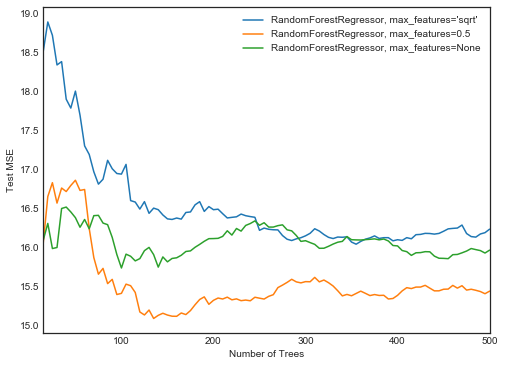

In [51]:
fig, ax = plt.subplots(1,1,figsize=(8,6))

for label, regr_err in error_rate.items():
    xs, ys = zip(*regr_err) # i(numbers of trees)와 error로 나누어 묶어준다.
    ax.plot(xs, ys, label=label)
    
ax.set_xlim(min_trees, max_trees)
ax.set_xlabel("Number of Trees")
ax.set_ylabel("Test MSE")
ax.legend(loc="upper right")
plt.show()

The number of trees **B**가 증가하면, overfitting이 일어나는 것으로 보인다...?

# 실습2

typically we choose **m ≈ √p**. That is, the number of predictors considered at each split is approximately equal to the square root of the total number of predictors

In [14]:
# 위와 동일한 데이터를 이용
X_train.columns

Index(['crim', 'zn', 'indus', 'chas', 'nox', 'rm', 'age', 'dis', 'rad', 'tax',
       'ptratio', 'black', 'lstat'],
      dtype='object')

총 13개의 feature를 가지고 있다. 1~13개까지 변경하면서, 과연 √13 = 4 에서 가장 test MSE가 가장 낮은지 확인하려고 한다.

In [55]:
test_error_list = []

for i in range(1,14):
    regr = RandomForestRegressor(max_features=i, n_estimators=100, random_state=123)
    regr.fit(X_train, y_train)
    pred = regr.predict(X_test)
    test_error = mean_squared_error(pred, y_test)
    test_error_list.append(test_error)

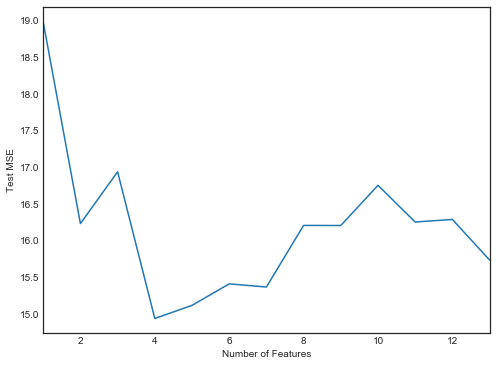

In [58]:
fig, ax = plt.subplots(1,1,figsize=(8,6))

ax.plot(range(1,14), test_error_list)
    
ax.set_xlim(1, 13)
ax.set_xlabel("Number of Features")
ax.set_ylabel("Test MSE")
plt.show()

실제로도 max_feature를 √13 = 4로 주었을때, Test MSE가 가장 낮은 것으로 확인 되었다.

# 실습 3

Unlike bagging and random forests, boosting **can overfit** if **B** is **too large**, although this overfitting tends to occur slowly if at all

In [2]:
hitters_df = pd.read_csv('hitters.csv')

In [3]:
# Salary가 null인 row는 제거
hitters_df = hitters_df[hitters_df['Salary'].notnull()]
# Salary를 log화
hitters_df['Salary'] = np.log(hitters_df['Salary'])

In [4]:
hitters_df.head()

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,League,Division,PutOuts,Assists,Errors,Salary,NewLeague
1,315,81,7,24,38,39,14,3449,835,69,321,414,375,N,W,632,43,10,6.163315,N
2,479,130,18,66,72,76,3,1624,457,63,224,266,263,A,W,880,82,14,6.173786,A
3,496,141,20,65,78,37,11,5628,1575,225,828,838,354,N,E,200,11,3,6.214608,N
4,321,87,10,39,42,30,2,396,101,12,48,46,33,N,E,805,40,4,4.516339,N
5,594,169,4,74,51,35,11,4408,1133,19,501,336,194,A,W,282,421,25,6.620073,A


문자형 categorical 변수(League, Division, NewLeague)는 숫자형으로 바꾸어준다.

In [5]:
hitters_df['League'] = pd.factorize(hitters_df['League'])[0]
hitters_df['Division'] = pd.factorize(hitters_df['Division'])[0]
hitters_df['NewLeague'] = pd.factorize(hitters_df['NewLeague'])[0]

In [6]:
X = hitters_df.drop('Salary', axis=1)
y = hitters_df.Salary

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=0)

In [111]:
min_trees = 15
max_trees = 5000

MSE_list_train = []
MSE_list_test  = []

for i in range(min_trees, max_trees+1, 50):
    regr = GradientBoostingRegressor(n_estimators=i, learning_rate=0.001)
    regr.fit(X_train, y_train)
    
    MSE_train = mean_squared_error(y_train, regr.predict(X_train))
    MSE_test  = mean_squared_error(y_test, regr.predict(X_test))
    
    MSE_list_train.append(MSE_train)
    MSE_list_test.append(MSE_test)

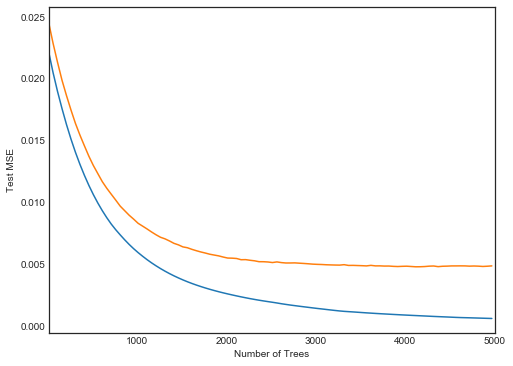

In [113]:
fig, ax = plt.subplots(1,1,figsize=(8,6))

ax.plot(range(min_trees, max_trees+1, 50), MSE_list_train, label='MSE_train')
ax.plot(range(min_trees, max_trees+1, 50), MSE_list_test, label='MSE_test')
    
ax.set_xlim(min_trees, max_trees)
ax.set_xlabel("Number of Trees")
ax.set_ylabel("Test MSE")
plt.show()

**B**가 커져도 overfitting이 발생하지 않는다...?? Sklearn에서의 GradientBoostingRegressor parameter에 대한 설명을 읽어보자.

"The number of boosting stages to perform. Gradient boosting is fairly robust to over-fitting so a large number usually results in better performance."

책과는 다르게 설명을 하고 있다. 아마도 책에서도 "can overfit"라고 설명을 하는 것을 보니, 그럴 가능성에 대해서만 암시하고 있는 것 같다.